# Loading the libraries

In [7]:
import numpy as np
import pandas as pd

In [8]:
import pickle

with open('y_test_banded.pickle', 'rb') as f:
    y_test_banded = pickle.load(f)
f.close()

with open('y_test_non_banded.pickle', 'rb') as f:
    y_test_non_banded = pickle.load(f)
f.close()


print("shape for y_test_banded",y_test_banded.shape)

print("shape for y_test_non_banded",y_test_non_banded.shape) 

shape for y_test_banded (7476, 1)
shape for y_test_non_banded (9564, 1)


In [9]:
y_test_non_banded.shape

(9564, 1)

## resversing predictions for making banding as positive result

In [10]:
y_test_banded1 = 1 - y_test_banded

In [11]:
y_test_non_banded1 = 1 - y_test_non_banded

In [12]:
y_test_banded1

array([[0.9966008 ],
       [0.9985055 ],
       [0.9990041 ],
       ...,
       [0.9552649 ],
       [0.99997306],
       [0.9859717 ]], dtype=float32)

In [13]:
y_test_non_banded1

array([[0.00554723],
       [0.05547214],
       [0.07592112],
       ...,
       [0.00700599],
       [0.22521937],
       [0.01014459]], dtype=float32)

## writing y=1 for banded and y = 0 for non banded

In [14]:
y_test_banded_actual = np.ones((y_test_banded1.shape[0],1))

In [15]:
y_test_non_banded_actual = np.zeros((y_test_non_banded1.shape[0],1))

## concatinating banded and non banded results

In [16]:
Y_test_pred = np.concatenate((y_test_banded1,y_test_non_banded1),axis=0)

In [17]:
Y_test_actual = np.concatenate((y_test_banded_actual,y_test_non_banded_actual),axis=0)

In [18]:
Y_test_pred.shape

(17040, 1)

In [19]:
Y_test_actual.shape

(17040, 1)

## Lets try ROC curve from Sklearn

In [20]:
from sklearn import metrics

In [21]:
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(Y_test_actual, Y_test_pred)

In [22]:
auc = metrics.roc_auc_score(Y_test_actual,Y_test_pred)
print('AUC: %.3f' % auc)

AUC: 0.964


Text(0.5, 1.0, 'ROC curve for model performance')

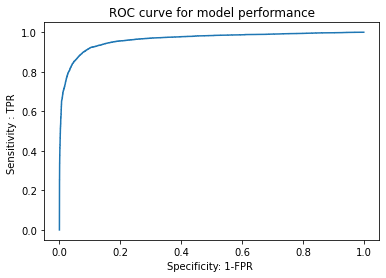

In [23]:
import matplotlib.pyplot as plt
plt.plot(fpr_test, tpr_test)
plt.xlabel("Specificity: 1-FPR ")
plt.ylabel("Sensitivity : TPR ")
plt.title("ROC curve for model performance")


## Plotting Precision Recall Curve

In [24]:
precision,recall,threshold = metrics.precision_recall_curve(Y_test_actual, Y_test_pred)

In [25]:
f1_score = []
for i in range(len(precision)):
    prec = precision[i]
    recl = recall[i]
    f1_temp = 2*prec*recl/(prec+recl)
    f1_score.append(f1_temp)

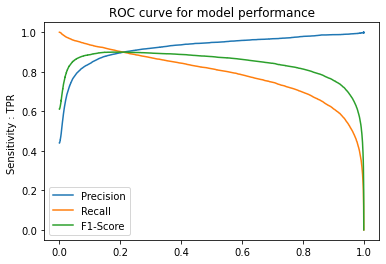

In [26]:
import matplotlib.pyplot as plt
plt.plot(threshold,precision[:-1],label = "Precision")
plt.plot(threshold,recall[:-1], label = "Recall")
plt.plot(threshold,f1_score[:-1], label = "F1-Score")
plt.ylabel("Sensitivity : TPR ")
plt.title("ROC curve for model performance")
plt.legend()


# Finding the optimal values of threshold

In [27]:
for i in range(len(precision)):
    prec = precision[i]
    recl = recall[i]
    if (prec == recl):
        print(threshold[i])
        break

0.20915085


## Lets make a function that returns TPs FPs and all for a given number of examples

In [28]:
def tell_me_the_matrix (a1, a2, threshold):
    actual = a1
    pred = a2
    num_samples = actual.shape[0]
    temp = np.zeros((num_samples,1))

    for i in range(num_samples):
        if(pred[i,:]>=threshold):
            temp[i,:]=1
        else :
            temp[i,:]=0
            
    print(temp-a2)
            
    #TP
    TP = 0
    #print(threshold)
    for i in range(num_samples):
        if (temp[i,:]==1) and (actual[i,:]==1):
            TP+=1
    print("True positives are ", TP)
    
    #FP
    FP = 0 
    for i in range(num_samples):
        if (temp[i,:]==1) and (actual[i,:]==0):
            FP+=1
    print("False positives are ", FP)
        
    #TN
    TN = 0 
    for i in range(num_samples):
        if (temp[i,:]==0) and (actual[i,:]==0):
            TN+=1
    print("True Negatives are ", TN)    
    
    #FN
    FN = 0 
    for i in range(num_samples):
        if (temp[i,:]==0) and (actual[i,:]==1):
            FN+=1
    print("False Negatives are ", FN)      
    
    return [TP,FP,TN,FN]    
    

In [29]:
import pandas as pd

In [30]:
accuracy =[]
TP = []
FP = []
TN = []
FN = []
TPR = []
FPR = []
Precision = []
Recall = []
F1_score = []
list_t = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.7,0.75,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
for i in list_t:
    a = tell_me_the_matrix(Y_test_actual, Y_test_pred,i)
    total = a[0]+a[1]+a[2]+a[3]
    TP.append(a[0]*100/total)
    FP.append(a[1]*100/total)
    TN.append(a[2]*100/total)
    FN.append(a[3]*100/total)
    Precision.append(a[0]/(a[0]+a[1]))
    Recall.append(a[0]/(a[0]+a[3]))
    accuracy.append((a[0]+a[2])/total)
    TPR.append(a[0]/(a[0]+a[3]))
    FPR.append(a[1]/(a[1]+a[2]))
    pr = a[0]/(a[0]+a[1])
    re = a[0]/(a[0]+a[3])
    F1_score.append(2*pr*re/(pr+re))

[[ 0.00339919]
 [ 0.00149453]
 [ 0.00099587]
 ...
 [-0.00700599]
 [ 0.77478063]
 [-0.01014459]]
True positives are  7161
False positives are  2048
True Negatives are  7516
False Negatives are  315
[[ 0.00339919]
 [ 0.00149453]
 [ 0.00099587]
 ...
 [-0.00700599]
 [ 0.77478063]
 [-0.01014459]]
True positives are  6998
False positives are  1315
True Negatives are  8249
False Negatives are  478
[[ 0.00339919]
 [ 0.00149453]
 [ 0.00099587]
 ...
 [-0.00700599]
 [ 0.77478063]
 [-0.01014459]]
True positives are  6878
False positives are  953
True Negatives are  8611
False Negatives are  598
[[ 0.00339919]
 [ 0.00149453]
 [ 0.00099587]
 ...
 [-0.00700599]
 [ 0.77478063]
 [-0.01014459]]
True positives are  6748
False positives are  784
True Negatives are  8780
False Negatives are  728
[[ 0.00339919]
 [ 0.00149453]
 [ 0.00099587]
 ...
 [-0.00700599]
 [-0.22521937]
 [-0.01014459]]
True positives are  6628
False positives are  664
True Negatives are  8900
False Negatives are  848
[[ 0.00339919]
 [ 

In [31]:
dict_val = {'accuracy':accuracy,'TP':TP,'FP':FP,'TN':TN,'FN':FN,'TPR':TPR,'FPR':FPR,'Precision':Precision,'Recall':Recall,'F1_score':F1_score}

In [32]:
df_val = pd.DataFrame.from_dict(dict_val) 

In [33]:
df_val['ind'] =list_t

In [34]:
df_val.set_index('ind')

,accuracy,TP,FP,TN,FN,TPR,FPR,Precision,Recall,F1_score
ind,,,,,,,,,,
0.05,0.861326,42.024648,12.018779,44.107981,1.848592,0.957865,0.214136,0.777609,0.957865,0.858376
0.10,0.894777,41.068075,7.717136,48.409624,2.805164,0.936062,0.137495,0.841814,0.936062,0.886440
0.15,0.908979,40.363850,5.592723,50.534038,3.509390,0.920011,0.099645,0.878304,0.920011,0.898674
0.20,0.911268,39.600939,4.600939,51.525822,4.272300,0.902622,0.081974,0.895911,0.902622,0.899254
0.25,0.911268,38.896714,3.896714,52.230047,4.976526,0.886570,0.069427,0.908941,0.886570,0.897616
0.30,0.909977,38.251174,3.380282,52.746479,5.622066,0.871857,0.060226,0.918805,0.871857,0.894715
0.35,0.908216,37.611502,2.916667,53.210094,6.261737,0.857277,0.051966,0.928034,0.857277,0.891253
0.40,0.906162,37.007042,2.517606,53.609155,6.866197,0.843499,0.044856,0.936303,0.843499,0.887482
0.45,0.902993,36.349765,2.177230,53.949531,7.523474,0.828518,0.038791,0.943488,0.828518,0.882273


In [35]:
df_val.to_csv(r'test_TPFP14epochs.csv', index = True)